# Correlation Matrix in Python Using Downloaded Stock Data
#### Assumes you have python and a number of supporting libraries installed. The easiest way to get most everything you need is to install the anaconda scientific platform by by visiting http://anaconda.com
#### You will also need to install fix_yahoo_finance separately in order to download data from Yahoo Finance.  From a command prompt enter pip install fix_yahoo_finance



### 1. Set up environment 

In [24]:
import numpy as np
import pandas as pd
import fix_yahoo_finance as fyf

#### Note fix_yahoo_finance is billed a a temporary solution to recent API changes at Yahoo Finance. Pandas does have a complimentary library, pandas_datareader that allows that downloading of data from a number of sources. See http://pandas-datareader.readthedocs.io/en/latest/ for more information.

### 2. Download data for FANG stocks

In [25]:
stocks = 'FB AMZN NFLX GOOG GLD'
stocks = stocks.split()
data = fyf.download(stocks, '2017-06-01')['Close']
data.head()

[*********************100%***********************]  5 of 5 downloaded


AMZN          FB         GLD        GOOG        NFLX
Date                                                                   
2017-06-01   995.950012  151.529999  120.720001  966.950012  162.990005
2017-06-02  1006.729980  153.610001  121.610001  975.599976  165.179993
2017-06-05  1011.340027  153.630005  121.730003  983.679993  165.059998
2017-06-06  1003.000000  152.809998  123.099998  976.570007  165.169998
2017-06-07  1010.070007  153.119995  122.449997  980.940002  165.610001

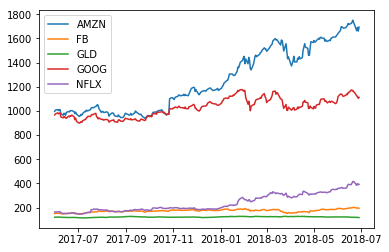

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(data)
plt.legend(['AMZN', 'FB', 'GLD', 'GOOG', 'NFLX'], loc=2)

### 3. Transform closing price into instantaneous rates of return

In [28]:
returns = pd.DataFrame()
for stock in data:
    if stock not in returns:
        returns[stock] = np.log(data[stock]).diff()
returns = returns[1:]        
returns.head()        

AMZN        FB       GLD      GOOG      NFLX
Date                                                        
2017-06-02  0.010766  0.013633  0.007345  0.008906  0.013347
2017-06-05  0.004569  0.000130  0.000986  0.008248 -0.000727
2017-06-06 -0.008281 -0.005352  0.011192 -0.007254  0.000666
2017-06-07  0.007024  0.002027 -0.005294  0.004465  0.002660
2017-06-08  0.000198  0.010331 -0.006555  0.002515  0.001629

### 4. Generate descriptives with pandas method [describe]

In [29]:
returns.describe()

AMZN          FB         GLD        GOOG        NFLX
count  271.000000  271.000000  271.000000  271.000000  271.000000
mean     0.001958    0.000947   -0.000081    0.000517    0.003244
std      0.016391    0.016286    0.006055    0.014043    0.023015
min     -0.053465   -0.070097   -0.016673   -0.051771   -0.066920
25%     -0.005644   -0.005880   -0.004032   -0.005591   -0.007866
50%      0.002006    0.001367    0.000419    0.000355    0.001415
75%      0.010913    0.010371    0.003726    0.008796    0.015286
max      0.124131    0.086740    0.017306    0.046910    0.127017

### 5. Create correlation matrix

In [30]:
returns.corr()

AMZN        FB       GLD      GOOG      NFLX
AMZN  1.000000  0.567449  0.014216  0.669412  0.615241
FB    0.567449  1.000000 -0.014326  0.715263  0.528524
GLD   0.014216 -0.014326  1.000000  0.033896  0.116871
GOOG  0.669412  0.715263  0.033896  1.000000  0.601479
NFLX  0.615241  0.528524  0.116871  0.601479  1.000000

In [32]:
returns.corr()['AMZN'].sort_values(ascending=False)

AMZN    1.000000
GOOG    0.669412
NFLX    0.615241
FB      0.567449
GLD     0.014216
Name: AMZN, dtype: float64

### 6. Graphically display correlations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116119080>,
      dtype=object)

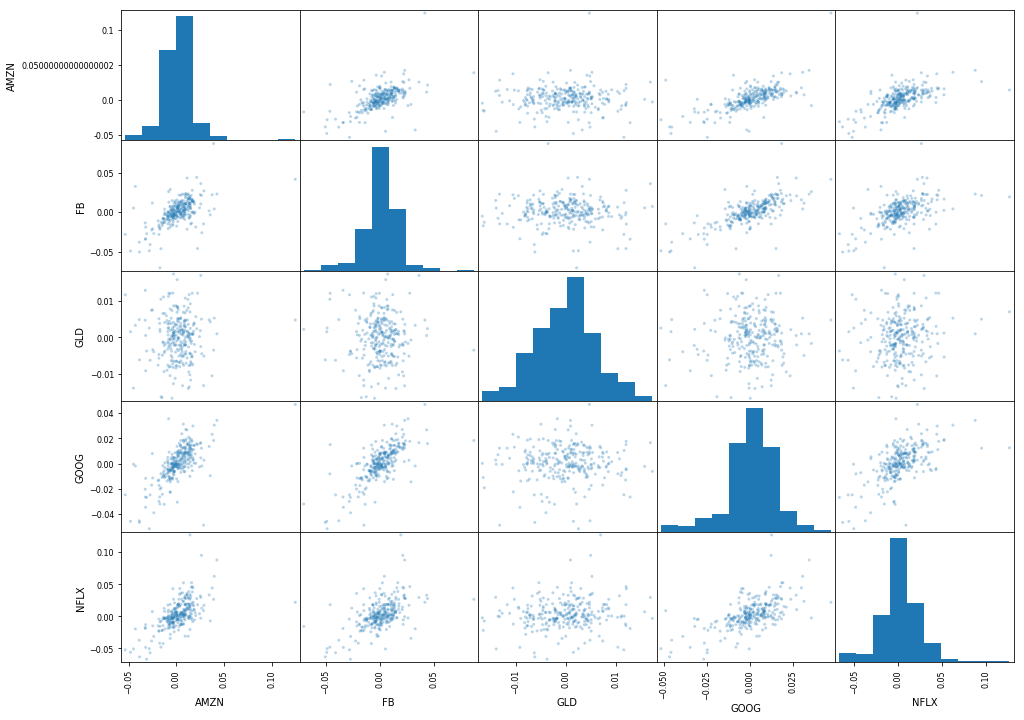

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(returns, figsize=(16,12), alpha=0.3)